In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# Replacing the zeros
data['citric acid']= data['citric acid'].replace(0, data['citric acid'].mean())

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.293345,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.177148,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.010000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.150000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.270976,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


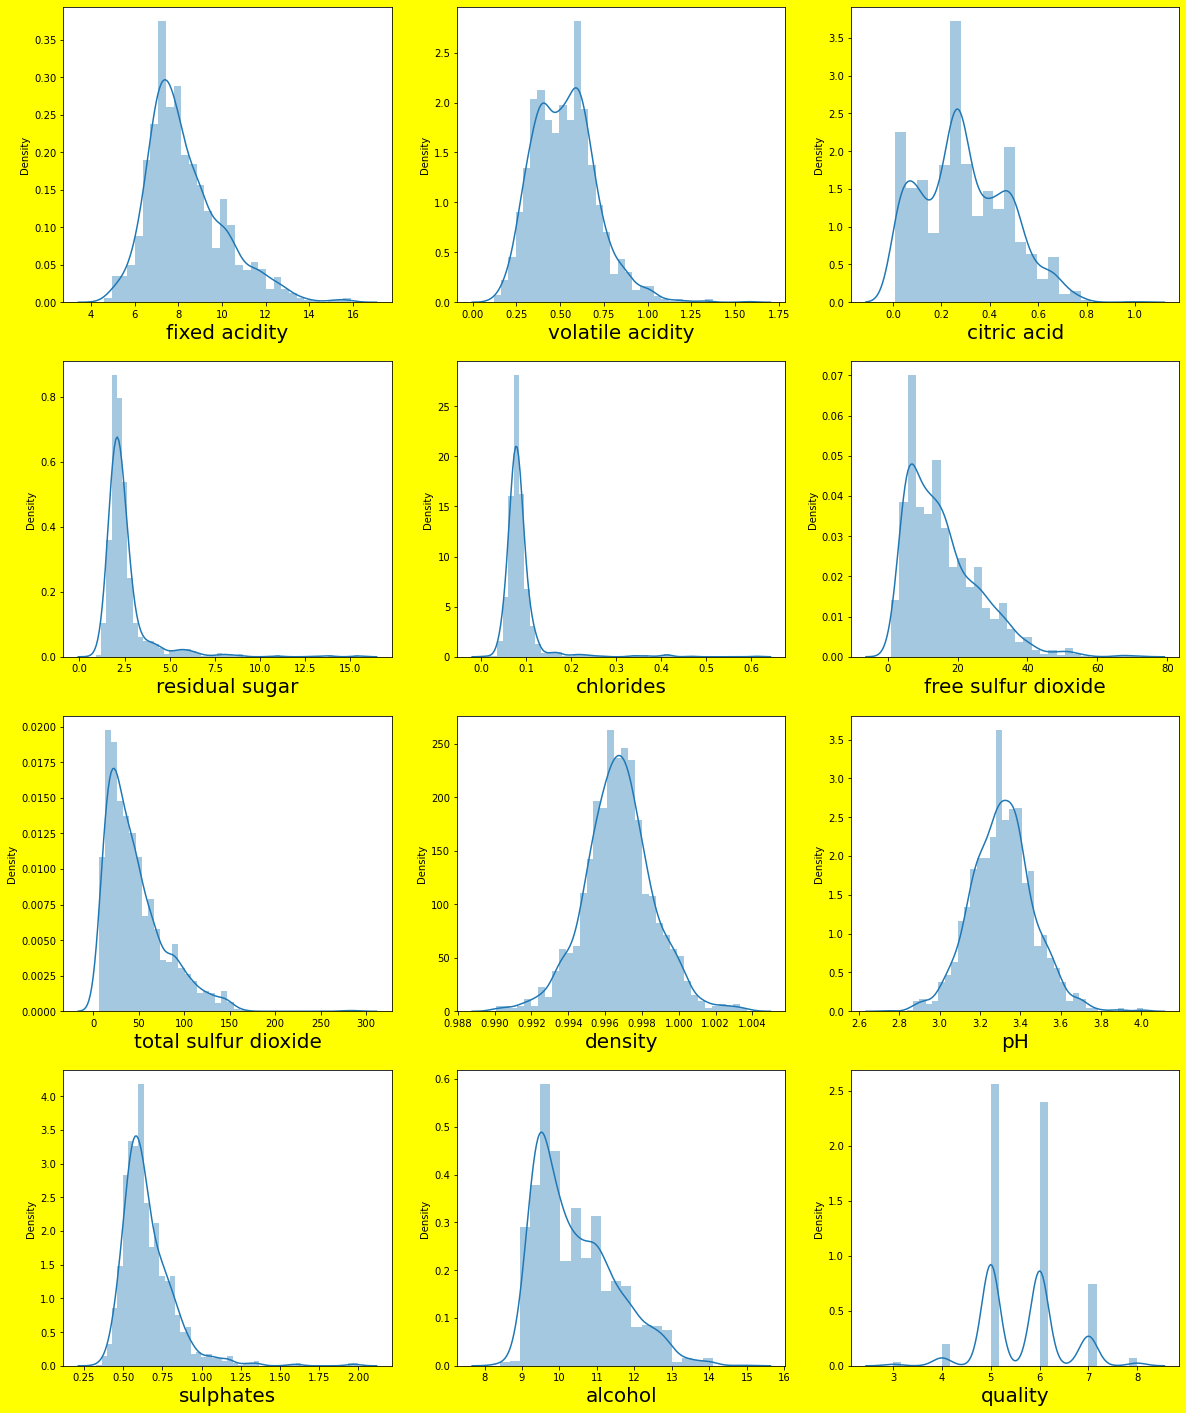

In [7]:
# To see data distribution for each column
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

In [8]:
df_features=data.drop('quality', axis=1)

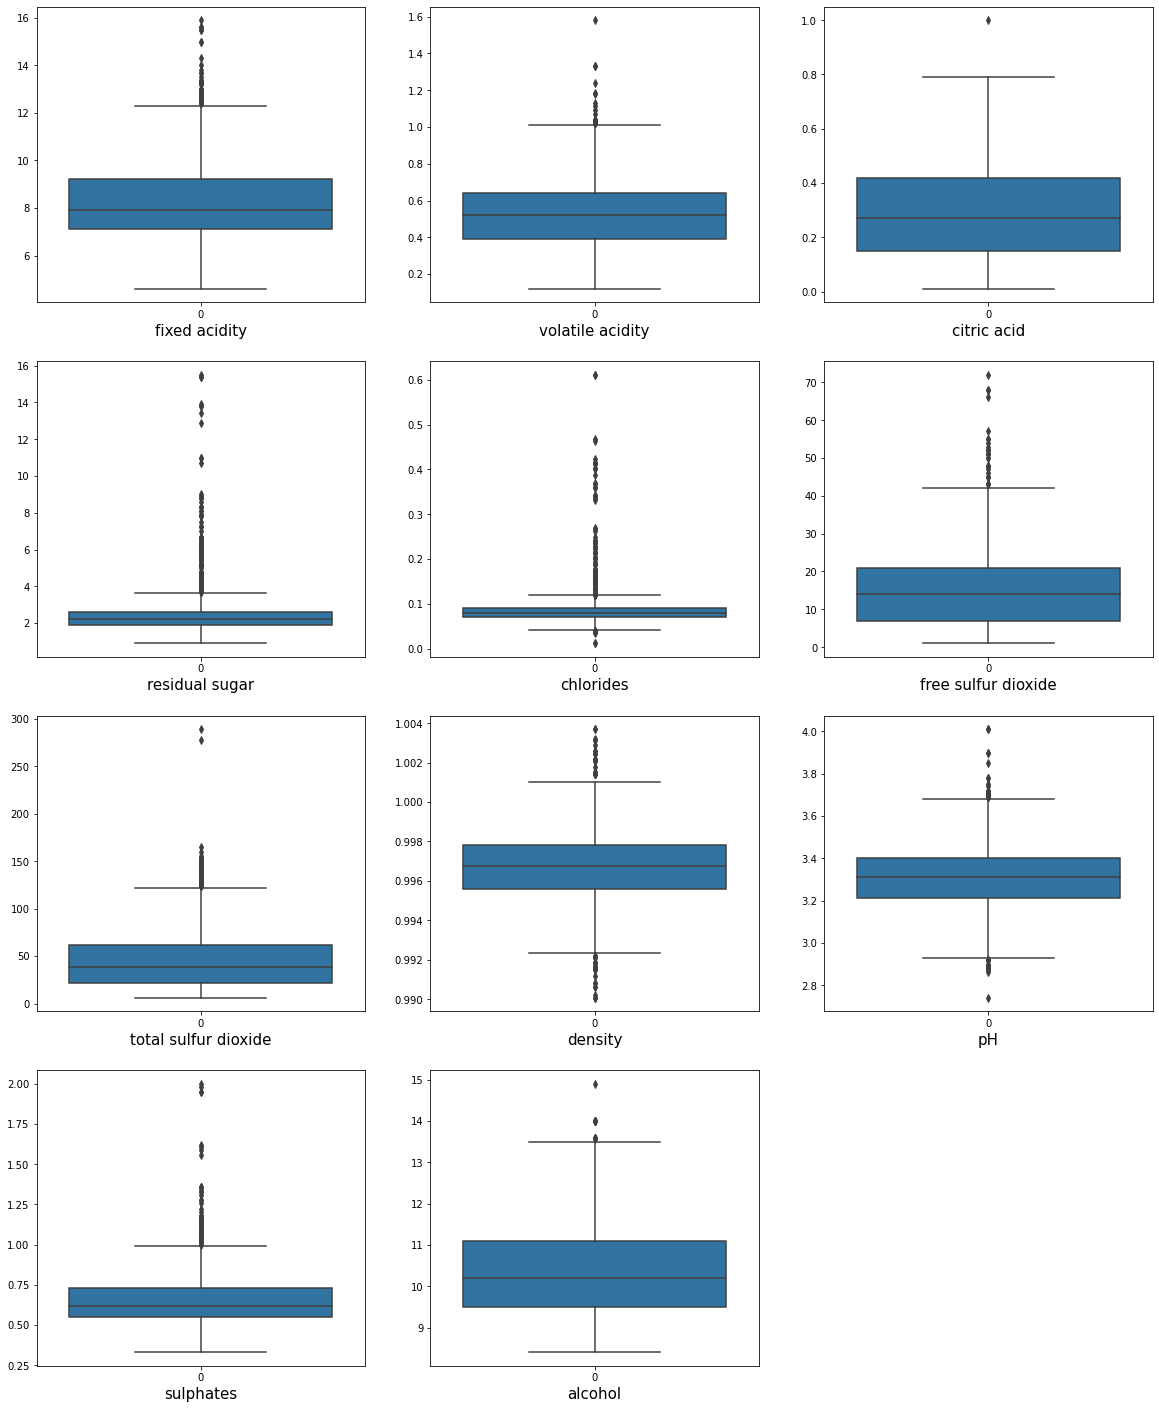

In [9]:
# Visualize the outliers using boxplot
plt.figure(figsize=(20,25))
graph=1
for column in df_features:
    if graph<=12:
        ax=plt.subplot(4,3,graph)
        sns.boxplot(data=df_features[column])
        plt.xlabel(column, fontsize=15)
    graph+=1
plt.show()

In [10]:
# Find the IQR to identify the outliers
#1st quartile
q1=data.quantile(0.25)
# 3rd quartile
q3=data.quantile(0.75)
# IQR
iqr= q3 - q1

In [11]:
# Validating Outliers

In [12]:
alc_high=(q3.alcohol + (1.5 * iqr.alcohol))
print(alc_high)

np_index=np.where(data['alcohol']> alc_high)
np_index

data=data.drop(data.index[np_index])
print(data.shape)

data.reset_index()

13.5
(1586, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1582,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1583,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1584,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
sul_high=(q3.sulphates + (1.5 * iqr.sulphates))
print(sul_high)

np_index=np.where(data['sulphates']> sul_high)
np_index

data=data.drop(data.index[np_index])
print(data.shape)

data.reset_index()

0.9999999999999999
(1527, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1523,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1524,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1525,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
ph_high=(q3.pH + (1.5 * iqr.pH))
print(ph_high)

np_index=np.where(data['pH']> ph_high)
np_index

data=data.drop(data.index[np_index])
print(data.shape)

data.reset_index()

3.6849999999999996
(1509, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1505,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1506,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1507,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [15]:
den_high=(q3.density + (1.5 * iqr.density))
print(den_high)

np_index=np.where(data['density']> den_high)
np_index

data=data.drop(data.index[np_index])
print(data.shape)

data.reset_index()

1.0011875
(1486, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1482,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1483,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1484,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [16]:
cl_high=(q3.chlorides + (1.5 * iqr.chlorides))
print(cl_high)

np_index=np.where(data['chlorides']> cl_high)
np_index

data=data.drop(data.index[np_index])
print(data.shape)

data.reset_index()

0.11999999999999998
(1416, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1412,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1413,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1414,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [17]:
ph_low=(q1.pH - (1.5 * iqr.pH))
print(ph_low)

np_index=np.where(data['pH']< ph_low)
np_index

data=data.drop(data.index[np_index])
print(data.shape)

data.reset_index()

2.925
(1408, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1404,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1405,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1406,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
den_low=(q1.density - (1.5 * iqr.density))
print(den_low)

np_index=np.where(data['density']< den_low)
np_index

data=data.drop(data.index[np_index])
print(data.shape)

data.reset_index()

0.9922475000000001
(1400, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1396,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1397,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1398,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [19]:
cl_low=(q1.chlorides - (1.5 * iqr.chlorides))
print(cl_low)

np_index=np.where(data['chlorides']< cl_low)
np_index

data=data.drop(data.index[np_index])
print(data.shape)

data.reset_index()

0.04000000000000002
(1394, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1390,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1391,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1392,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [41]:
tsd_high=(q3.total sulfur dioxide + (1.5 * iqr.total sulfur dioxide))
print(tsd_high)

np_index=np.where(data['total sulfur dioxide']> tsd_high)
np_index

data=data.drop(data.index[np_index])
print(data.shape)

data.reset_index()

SyntaxError: invalid syntax (Temp/ipykernel_17052/1697127436.py, line 1)

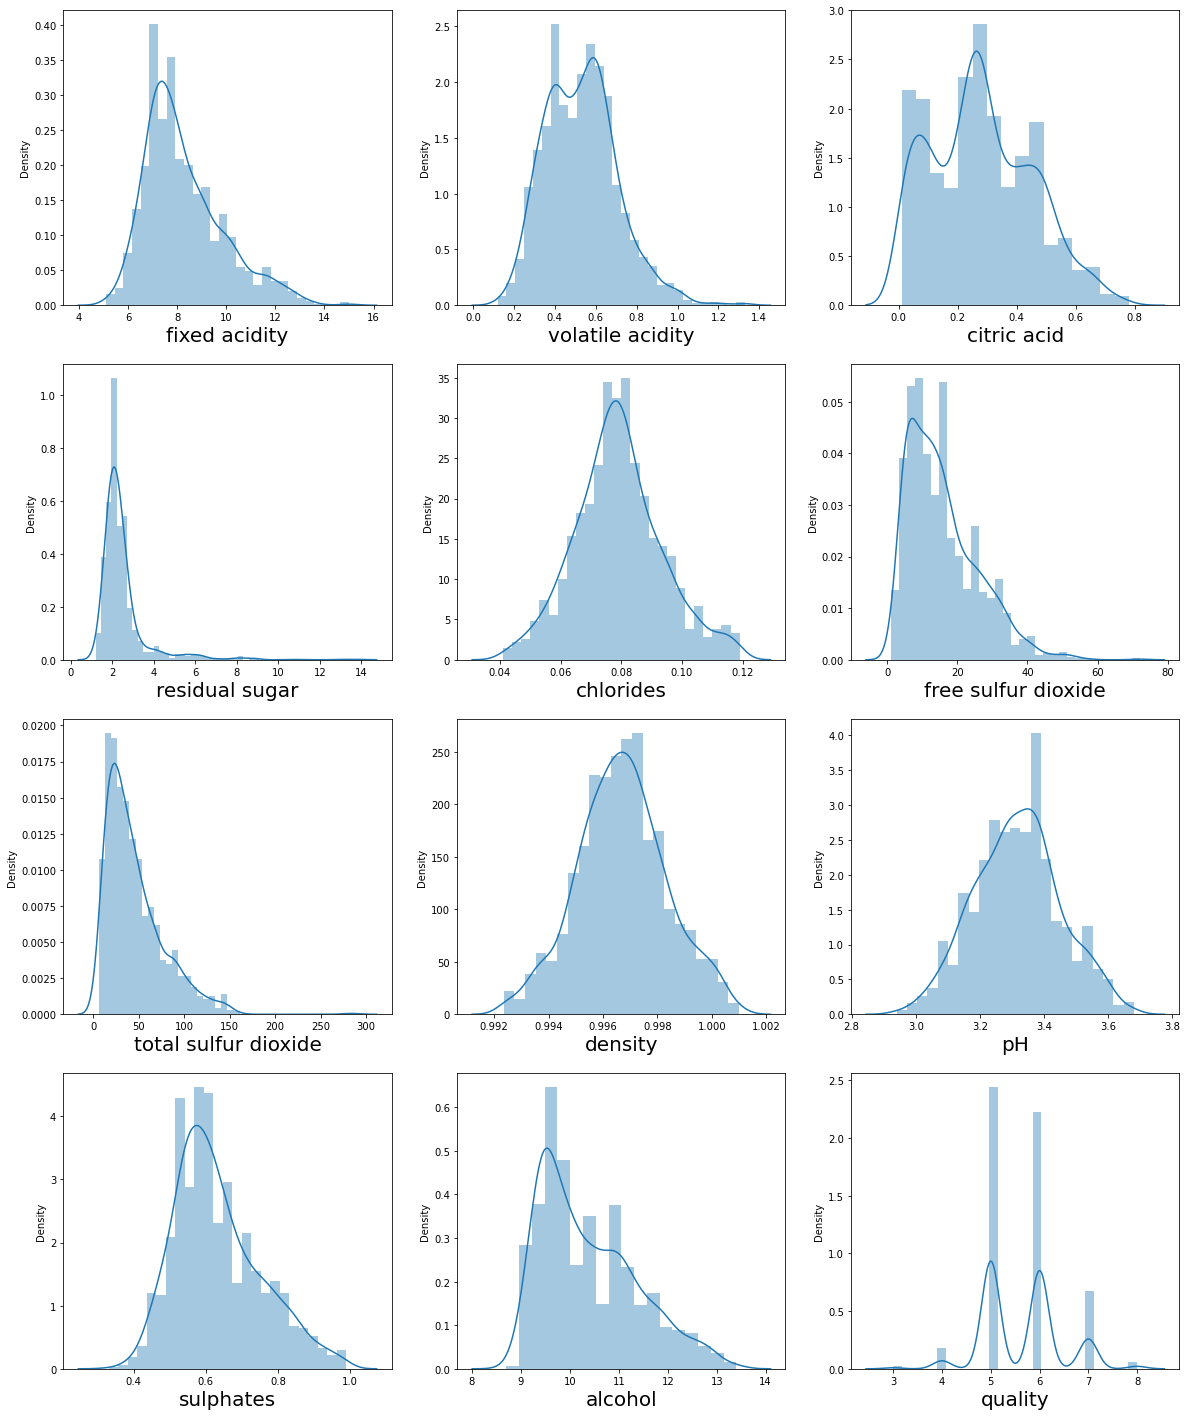

In [20]:
# Lets see how data is distributed for each column
plt.figure(figsize=(20,25))
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

In [21]:
# Find relation between features and labels
x=data.drop(columns=['quality'])
y=data['quality']

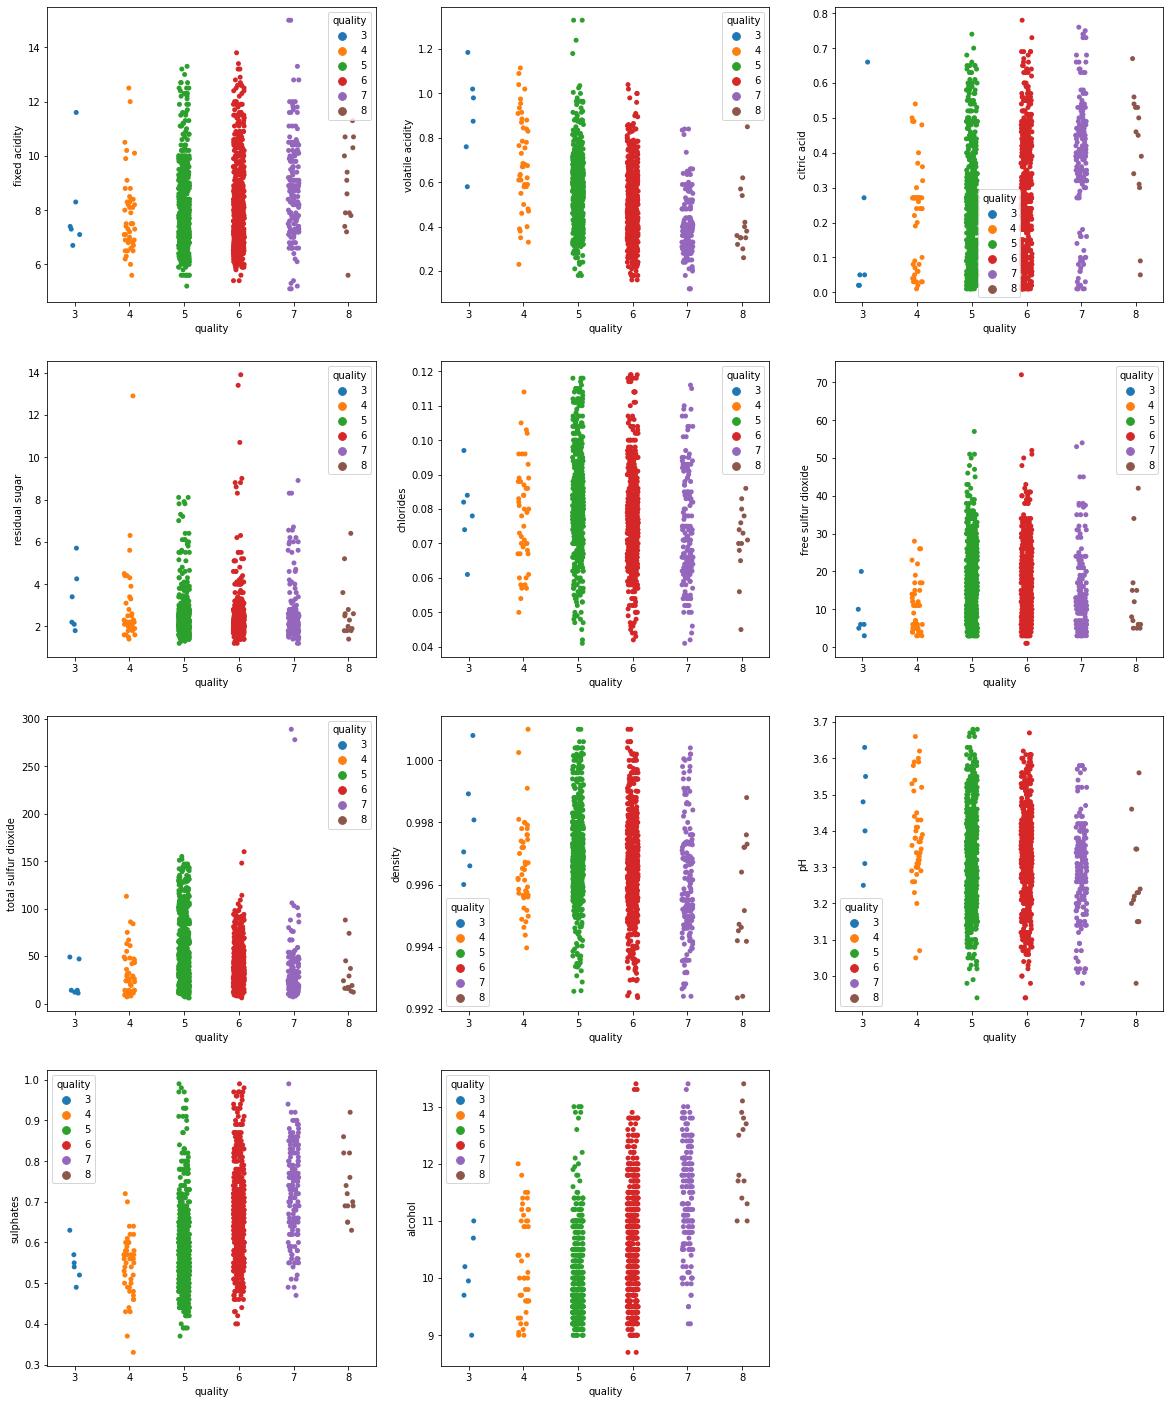

In [22]:
# Lets see how labels are related to class
plt.figure(figsize=(20,25))
plotnumber=1
for column in x:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.stripplot(x=y, y=x[column], hue=y)
    plotnumber+=1
plt.show()

In [23]:
# Find if one feature is dependent on another feature
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [24]:
x_scaled.shape[1]

11

In [25]:
vif=pd.DataFrame()
vif['vif']= [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features']= x.columns
vif

,vif,Features
0,7.063960,fixed acidity
1,1.654610,volatile acidity
2,2.451751,citric acid
3,1.556946,residual sugar
4,1.266508,chlorides
5,1.884123,free sulfur dioxide
6,2.099254,total sulfur dioxide
7,5.799331,density
8,3.055113,pH
9,1.370661,sulphates


In [26]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=355)

In [27]:
log_reg=LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [28]:
y_pred=log_reg.predict(x_test)
y_pred

array([5, 5, 7, 6, 6, 6, 6, 6, 7, 5, 5, 7, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6,
       6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 7, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5,
       6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6,
       6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 7, 6, 5, 6, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 6, 7, 6, 6, 5, 6, 7, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5,
       6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5,
       5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 7, 5, 5, 5, 6, 7, 6, 6, 7, 6, 5,
       6, 5, 7, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5,
       6, 7, 5, 6, 6, 5, 5, 6, 5, 5, 5, 7, 5, 6, 5, 5, 5, 6, 5, 6, 6, 7,
       5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 7, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6,
       6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 7, 5, 6, 6, 6,
       6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 7, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6,
       6, 6, 5, 7, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6,

In [29]:
log_reg.predict_proba(x_test)

array([[1.05836587e-03, 2.59821148e-02, 7.12037386e-01, 2.55280384e-01,
        5.57352548e-03, 6.82233348e-05],
       [5.86174340e-04, 1.67001767e-02, 4.76553303e-01, 4.75020081e-01,
        3.08763150e-02, 2.63950019e-04],
       [4.06218072e-05, 8.71264634e-04, 1.76105853e-02, 3.28787361e-01,
        6.44368819e-01, 8.32134897e-03],
       ...,
       [5.39888987e-04, 1.11305709e-02, 6.88191021e-01, 2.78773491e-01,
        2.13325801e-02, 3.24479301e-05],
       [7.49590177e-03, 9.04171896e-02, 5.97503557e-01, 2.86563686e-01,
        1.76704866e-02, 3.49179375e-04],
       [5.79309779e-04, 1.55955492e-02, 5.52486241e-01, 4.05591758e-01,
        2.54924235e-02, 2.54718017e-04]])

In [30]:
#Model Accuracy
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.5587392550143266

In [31]:
#Confusion Matrix
cnf_mat=confusion_matrix(y_test, y_pred)
cnf_mat

array([[  0,   0,   3,   0,   0,   0],
       [  0,   0,  10,   3,   0,   0],
       [  0,   0, 107,  42,   1,   0],
       [  0,   0,  56,  77,   4,   0],
       [  0,   0,   1,  28,  11,   0],
       [  0,   0,   0,   4,   2,   0]], dtype=int64)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.60      0.71      0.65       150
           6       0.50      0.56      0.53       137
           7       0.61      0.28      0.38        40
           8       0.00      0.00      0.00         6

    accuracy                           0.56       349
   macro avg       0.29      0.26      0.26       349
weighted avg       0.53      0.56      0.53       349



In [40]:
#ROC Curve
fpr, tpr, thresholds= roc_curve(y_test, y_pred)

ValueError: multiclass format is not supported